<a href="https://colab.research.google.com/github/sujata1712/Capstone_Project_1/blob/main/Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CAPSTONE PROJECT 1: NATIONAL HEALTH AND NUTRITION EXAMINATION SURVEY***


---


***Working with Numpy Matrices (Multidimensional Data)***

# **Introduction:**

This project will focus on body measurement data from the National Health and Nutrition Examination Survey (NHANES). We will be performing data manipulation, plotting and analysis with Python libraries NumPy & Matplotlib. The data are the body measurements of adult males and females.

# **Data Descriptions:**

The two following experts from the NHANES dataset:
1. nhanes_adult_male_bmx_2020.csv
2. nhanes_adult_female_bmx_2020.csv

Read the two files as Nampai mattresses named male and female. Each matrix consists of seven columns.
1. weight(kg)
2. standing height(cm)
3. upper arm height(cm)
4. upper leg height(cm)
5. arm circumfrence(cm)
6. hip circumfrence(cm)
7. waist circumfrence(cm)

# **Importing Necessary Libraries**

In [47]:
# Import packages
import pandas as pd # for data manupulation
import numpy as np # for numerical operation
# from scipy import stats
# from scipy.stats import skew, kurtosis
# from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt# Necessary module for plotting purpose
import seaborn as sns # Data visualization
# %matplotlib inline

import warnings
warnings.filterwarnings("ignore");             # Ignore warnings

# **Connect to Google Drive**

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.   **Download and Load Data**



First, we'll download the NHANES dataset and import the appropriate CSV files into NumPy matrices.

*   nhanes_adult_male_bmx_2020.csv
*   nhanes_adult_female_bmx_2020.csv

In [51]:
male_df=pd.read_csv('/content/drive/MyDrive/Capstone project 1/nhanes_adult_male_bmx_2020.csv')
female_df=pd.read_csv('/content/drive/MyDrive/Capstone project 1/nhanes_adult_female_bmx_2020.csv')

**Summary:**

The two datasets are then loaded into NumPy matrices named 'male' and 'female', where each row represents an individual and the columns contain body measurements.

The skip_header=1 argument is applied in order to omit the first rows of CSVs.

# 2.  **Read, Explore and Clean the Data**



* **Extract the shape and first few rows of the matrices for further analysis.**

In [52]:
# Convert your NumPy array to a Pandas DataFrame
male=pd.DataFrame(male_df)
female=pd.DataFrame(female_df)

print("Male data shape:", male.shape)
print("\nFemale data shape:", female.shape)

print("\nFirst few rows of male data:\n", male.head())
print("\nFirst few rows of female data:\n", female.head())

Male data shape: (4081, 7)

Female data shape: (4221, 7)

First few rows of male data:
    BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST
0   98.8  182.3     42.0    40.1     38.2   108.2     120.4
1   74.3  184.2     41.1    41.0     30.2    94.5      86.8
2  103.7  185.3     47.0    44.0     32.0   107.8     109.6
3   86.0  167.8     39.5    38.4     29.0   106.4     108.3
4   99.4  181.6     40.4    39.9     36.0   120.2     107.0

First few rows of female data:
    BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST
0   97.1  160.2     34.7    40.8     35.8   126.1     117.9
1   91.1  152.7     33.5    33.0     38.5   125.5     103.1
2   73.0  161.2     37.4    38.0     31.8   106.2      92.0
3   61.7  157.4     38.0    34.7     29.0   101.0      90.5
4   55.4  154.6     34.6    34.0     28.3    92.5      73.2


* **Display basic info and statistics.**

In [53]:
# Display basic info
print("Male data info:")
print(male.info())
print("\nFemale data info:")
print(female.info())

# Display basic statistics
print("\nMale data describe:")
print(male.describe())
print("\nFemale data describe:")
print(female.describe())

Male data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXWT     4081 non-null   float64
 1   BMXHT     4081 non-null   float64
 2   BMXARML   4081 non-null   float64
 3   BMXLEG    4081 non-null   float64
 4   BMXARMC   4081 non-null   float64
 5   BMXHIP    4081 non-null   float64
 6   BMXWAIST  4081 non-null   float64
dtypes: float64(7)
memory usage: 223.3 KB
None

Female data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4221 entries, 0 to 4220
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXWT     4221 non-null   float64
 1   BMXHT     4221 non-null   float64
 2   BMXARML   4221 non-null   float64
 3   BMXLEG    4221 non-null   float64
 4   BMXARMC   4221 non-null   float64
 5   BMXHIP    4221 non-null   float64
 6   BMXWAIST  4221 non-null   float64
dtyp

* **Clean missing & duplicate values of the datasets.**

In [54]:
# Check for missing values in the male and female matrices
np.isnan(male).sum(), np.isnan(female).sum()

# Remove rows with any NaN values
male = male[~np.isnan(male).any(axis=1)]
female = female[~np.isnan(female).any(axis=1)]

# Ensure no duplicate rows
male = np.unique(male, axis=0)
female = np.unique(female, axis=0)

# Ensure data ranges are realistic (example: weight > 0 kg, height > 0 cm)
male = male[(male[:, 0] > 0) & (male[:, 1] > 0)]
female = female[(female[:, 0] > 0) & (female[:, 1] > 0)]

# print shape after cleaning
print("Male data shape after cleaning:", male.shape)
print("Female data shape after cleaning:", female.shape)

Male data shape after cleaning: (4081, 7)
Female data shape after cleaning: (4221, 7)


* **Remove the outliers.**

In [55]:
# Remove outliers
def remove_outliers(data):
    Q1, Q3 = np.percentile(data, [25, 75], axis=0)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    mask = np.all((data >= lower_bound) & (data <= upper_bound), axis=1)

    # Return data without outliers
    return data[mask]

# Apply the function to remove outliers
male = remove_outliers(male)
female = remove_outliers(female)

# print shape after cleaning
print("Male data shape after remove outliers:", male.shape)
print("Female data shape after remove outliers:", female.shape)

Male data shape after remove outliers: (3856, 7)
Female data shape after remove outliers: (3987, 7)


**Summary:**

* First, the form and first few rows of both male and female participants were effectively recovered for analysis.

* Then, we explore the datasets .

* Then we clean missing & duplicate value the two matrices.

* Also, we remove the outliers of the both datasets.

Now, we can see that no. of row of both datasets is reduced.

# 3.   **Plot Histograms of Weights**



Next, we will visualize the distribution of weights for both males and females using histograms.

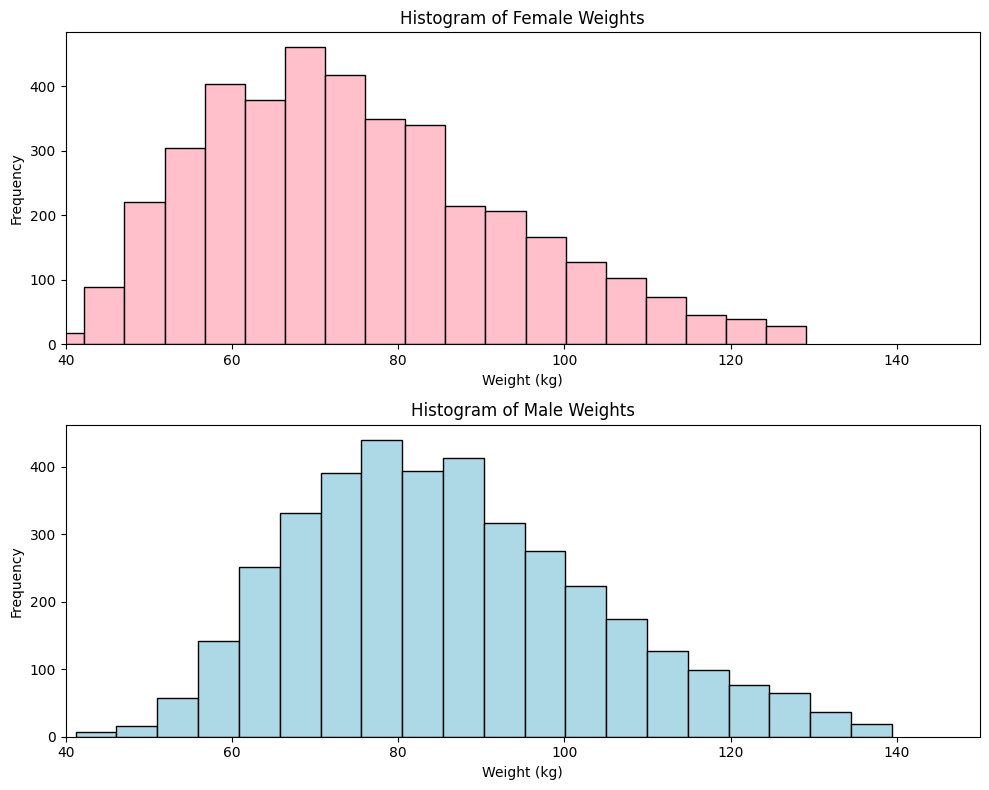

In [56]:
# Extract weights using column index 0
male_weights = male[:, 0]
female_weights = female[:, 0]

# Set the figure size
plt.figure(figsize=(10, 8))

# Top subplot for female weights
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=20, color='pink', edgecolor='black')
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(40, 150)                           # Set appropriate limits

# Bottom subplot for male weights
plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(40, 150)                           # Set same limits for comparison

plt.tight_layout()
plt.show()

**Summary:**

In this code, we are generating histograms of male and female weights & arranging them into different subplots for comparison. To make the comparison consistent, I fixed the x-axis bounds to exactly same for each histogram.

# 4. **Box-and-Whisker Plot for Weights**

We will create a box-and-whisker plot to compare the weight distributions of males and females.

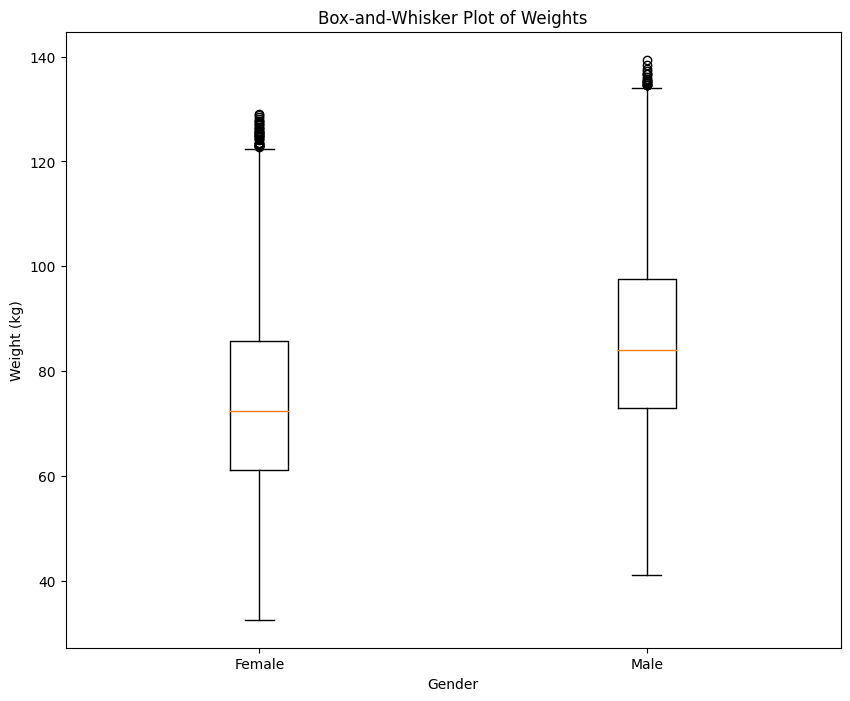

In [57]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create boxplot and whisker plot
plt.boxplot([female_weights,male_weights],labels=['Female','Male'])
plt.title('Box-and-Whisker Plot of Weights')
plt.xlabel('Gender')
plt.ylabel('Weight (kg)')
plt.show()


**Observations:**
* **Median Weights:**
Central Tendency (Mean vs Median) For Male and Female weights, median average weight >_median male AverageWeight Male mean < mean Female.Zoomed in to see how the values compare.
* **Interquartile Range (IQR):**
Males have a larger IQR relative to females, or in other words their weights are more spread out.
* **Range and Outliers:** Males might have more outliers compared to females, where whiskers are the likely resources of this difference it tend outgrow longer. This indicates males weight is also more normally distributed, and spread out over a higher range of weights.

**Summary:**

The box-and-whisker plot confirms that males as a group tend to weigh generally more (higher median value) and have greater dispersion in weight. Males have more outliers in the upper weight range, i.e: some people with much higher weights.

# 5. **Basic Numerical Aggregates**

Next, we will compute basic numerical aggregates for the weights of both genders.

In [58]:
# Compute basic statistics

female_stats = {
    'mean': np.mean(female_weights),
    'median': np.median(female_weights),
    'std': np.std(female_weights),
    'min': np.min(female_weights),
    'max': np.max(female_weights),
    'skewness': np.mean(((female_weights - np.mean(female_weights)) /  np.std(female_weights)) ** 3)
}

male_stats = {
    'mean': np.mean(male_weights),
    'median': np.median(male_weights),
    'std': np.std(male_weights),
    'min': np.min(male_weights),
    'max': np.max(male_weights),
    'skewness': np.mean(((male_weights - np.mean(male_weights)) /  np.std(male_weights)) ** 3)
}

female_stats, male_stats


({'mean': 74.91607725106596,
  'median': 72.5,
  'std': 18.080096015947365,
  'min': 32.6,
  'max': 129.1,
  'skewness': 0.5601134923452603},
 {'mean': 86.04214211618257,
  'median': 84.1,
  'std': 17.967569201910596,
  'min': 41.2,
  'max': 139.4,
  'skewness': 0.4717684246869687})

**Observations:**

- **Location:** The mean and median weights of males are higher than those of females, suggesting that they weigh more overall.
- **Dispersion:** A higher standard deviation indicates that males have more variation in their weight.
- **Shape:** The two distributions have a right skew, with a tail that extends toward higher weights and more people weighing less than the mean.

**Summary:**

In comparison to the female distribution, the male weight distribution exhibits a greater mean, median, and dispersion. It looks that both distributions are right-skewed, with men showing higher variation in their weights.

# 6. **Adding BMI to Female Matrix**

The steps below can be used to add a Body Mass Index (BMI) column to the female matrix:

To extract the heights, first convert the centimeter values to meters. Then, use the formula **BMI = weight (kg) / (height (m))^2** to calculate the BMI. Finally, add a BMI column. Add a new column to the female matrix with the computed BMI values.

In [59]:
# Extract height in meters (assuming height is in cm in the matrix)
female_height = female[:, 1] / 100

# Calculate BMI
female_bmi = female_weights / (female_height ** 2)

# Add BMI as a new column to the female matrix
female = np.column_stack((female, female_bmi))

# print first few rows
print("First five rows of updated female data with BMI:\n", female[:5])

First five rows of updated female data with BMI:
 [[ 32.6        151.5         32.4         33.4         20.4
   77.3         64.7         14.20340054]
 [ 36.2        147.3         32.          36.9         22.1
   79.8         56.4         16.68411124]
 [ 36.9        158.8         32.          38.4         19.
   80.2         62.7         14.63273036]
 [ 37.7        158.3         35.5         38.8         19.8
   74.          66.2         15.04456103]
 [ 38.2        147.          30.7         33.7         21.3
   79.4         63.7         17.67781943]]


**Summary:**

* **'female_height':** The height is converted from centimeters to meters using it.
* **'female_bmi'** determines the BMI of every participant who is female.
The BMI values are appended to the female matrix as the final column by using * **'np.column_stack((female, female_bmi))'**.

The BMI values for each female participant will be added to an additional column in the female matrix once this code has been performed.


# 7. **Standardize Female Matrix**

The female dataset will be standardized by calculating z-scores for every column.

The procedures below can be used to generate a new matrix called zfemale, which is a standardized version of the female dataset with z-scores applied to all of its columns:

1. Determine the female matrix's Mean and Standard Deviation for every column.
2. To standardize each column, divide the result by the standard deviation and subtract the mean.


In [60]:
# Compute the mean and standard deviation for each column in the female matrix
mean_female = np.mean(female, axis=0)
std_female = np.std(female, axis=0)

# Calculate the z-scores for each column (standardize the data)
zfemale = (female - mean_female) / std_female

print("First five rows of standardized female data:\n", zfemale[:5])

First five rows of standardized female data:
 [[-2.34047857 -1.24671606 -1.60528697 -1.23178309 -2.34794168 -2.23970899
  -2.05958598 -2.26062368]
 [-2.14136458 -1.87012249 -1.78927838 -0.07309425 -2.00913518 -2.05412352
  -2.59227216 -1.88831428]
 [-2.10264797 -0.16317632 -1.78927838  0.42348667 -2.62695879 -2.02442984
  -2.18794409 -2.19618911]
 [-2.05840042 -0.23739137 -0.17935355  0.55590825 -2.46752044 -2.48468182
  -1.96331739 -2.13438084]
 [-2.0307457  -1.91465152 -2.38725046 -1.1324669  -2.16857353 -2.08381719
  -2.12376504 -1.73917682]]


**Summary:**

The female dataset has been standardized, allowing for better comparison across measurements .

# 8. **Scatterplot Matrix (Pairplot) for Standardized Female Data and  Compute Pearson's and Spearman's Correlation Coefficients**


Proceed as follows to generate a scatterplot matrix (pairplot) from the zfemale matrix for the standardized versions of height, weight, hip circumference, waist circumference, and BMI, as well as to calculate the Pearson's and Spearman's correlation coefficients:

### 1. ***Draw the Scatterplot Matrix(Pairplot):***

First, let's create the pairplot using the 'seaborn' library.

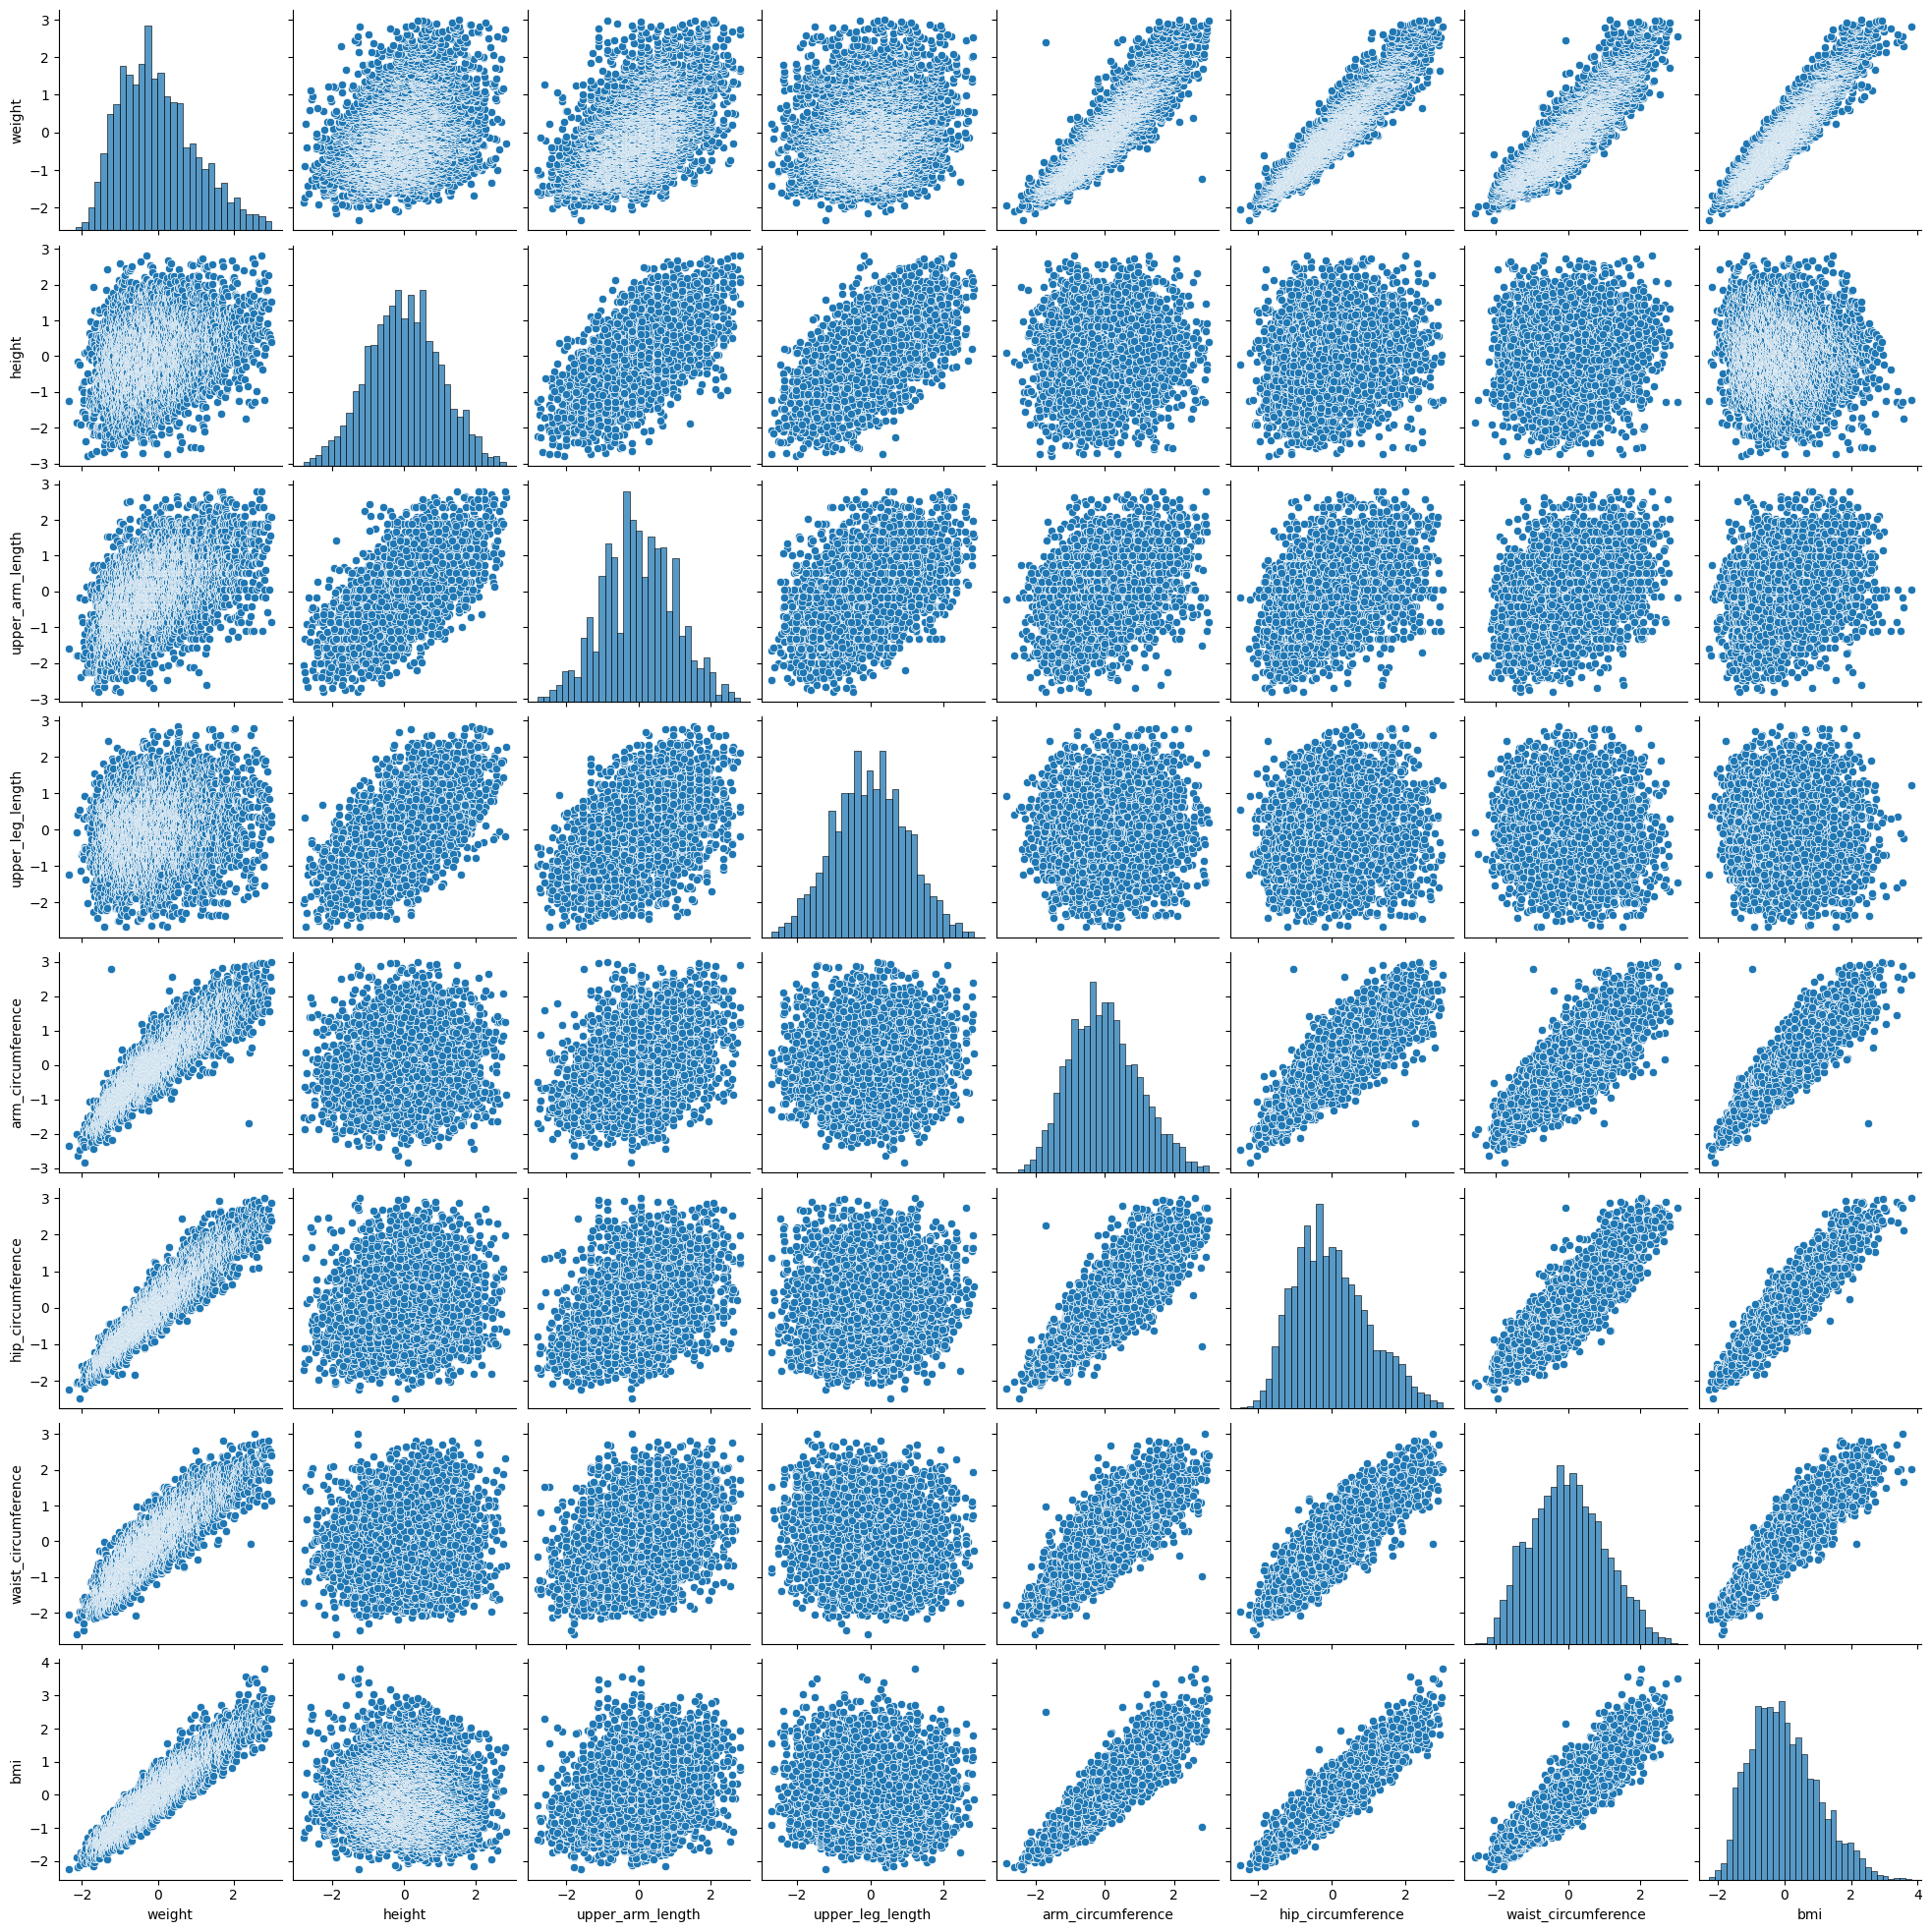

In [61]:
# Convert standardized matrix to DataFrame
df_zfemale = pd.DataFrame(zfemale, columns=['weight', 'height', 'upper_arm_length', 'upper_leg_length', 'arm_circumference', 'hip_circumference', 'waist_circumference', 'bmi'])

# Create a pairplot
sns.pairplot(df_zfemale)
plt.show()



**Summary:**

Relationships between the chosen variables are visualized using the scatterplot matrix. Next, we will calculate the correlation coefficients.

### 2.  ***Compute Pearson's and Spearman's Correlation Coefficients:***  

Next, let's calculate both Pearson's and Spearman's correlation coefficients for these variables.

In [62]:
# Compute Pearson's correlation coefficients
pearson_corr = df_zfemale.corr(method='pearson')

# Compute Spearman's correlation coefficients
spearman_corr = df_zfemale.corr(method='spearman')

# Display the correlation matrices
print("Pearson's Correlation Coefficients:\n", pearson_corr)
print("\nSpearman's Correlation Coefficients:\n", spearman_corr)

Pearson's Correlation Coefficients:
                        weight    height  upper_arm_length  upper_leg_length  \
weight               1.000000  0.317725          0.509477          0.187973   
height               0.317725  1.000000          0.655113          0.644470   
upper_arm_length     0.509477  0.655113          1.000000          0.468295   
upper_leg_length     0.187973  0.644470          0.468295          1.000000   
arm_circumference    0.896965  0.104669          0.391210          0.063538   
hip_circumference    0.936267  0.161673          0.409966          0.093763   
waist_circumference  0.888042  0.074614          0.374327         -0.062701   
bmi                  0.935233 -0.029446          0.299492         -0.035729   

                     arm_circumference  hip_circumference  \
weight                        0.896965           0.936267   
height                        0.104669           0.161673   
upper_arm_length              0.391210           0.409966   
upper_l

**Interpretation of Results:**

**Pearson's Correlation**: It measures the strength and direction of linear correlations. For example, a significant positive Pearson correlation between weight and BMI indicates that when weight increases, so does BMI.

**Spearman's Correlation:** Measures the strength of monotonic correlations based on data rank. It may emphasize non-linear relationships.


# 9. **Compute Waist-to-Height and Waist-to-Hip Ratios**

We will compute the waist circumference to height ratio and the waist circumference to hip circumference ratio for both male and female participants.

In [63]:
# Extract necessary columns from the male and female matrices

m_waist = male[:, 6]    # Assuming waist circumference is in column 7
m_height = male[:, 1]   # Assuming height is in column 2
m_hip = male[:, 5]      # Assuming hip circumference is in column 6

f_waist = female[:, 6]    # Assuming waist circumference is in column 7
f_height = female[:, 1]   # Assuming height is in column 2
f_hip = female[:, 5]      # Assuming hip circumference is in column 6

# Compute the waist-to-height and waist-to-hip ratios for males

male_wht_ratio = m_waist / m_height      # male_waist_height_ratio
male_whp_ratio = m_waist / m_hip         # male_waist_hip_ratio

# Compute the waist-to-height and waist-to-hip ratios for females

female_wht_ratio = f_waist / f_height     # female_waist_height_ratio
female_whp_ratio = f_waist / f_hip        # female_waist_hip_ratio

# Add the computed ratios as new columns to the male and female matrices
male = np.column_stack((male, male_wht_ratio, male_whp_ratio))
female = np.column_stack((female, female_wht_ratio, female_whp_ratio))

print("First five rows of updated male data with ratios:\n", male[:5])
print("\nFirst five rows of updated female data with ratios:\n", female[:5])


First five rows of updated male data with ratios:
 [[ 41.2        162.6         34.3         39.1         22.7
   80.          66.2          0.40713407   0.8275    ]
 [ 43.7        157.          34.3         36.9         24.1
   80.8         65.3          0.41592357   0.80816832]
 [ 44.1        164.2         35.5         41.3         24.2
   79.4         66.           0.40194884   0.83123426]
 [ 44.5        168.6         35.3         39.5         25.5
   78.5         65.9          0.39086595   0.83949045]
 [ 44.7        164.9         33.7         39.6         25.2
   77.7         67.3          0.40812614   0.86615187]]

First five rows of updated female data with ratios:
 [[ 32.6        151.5         32.4         33.4         20.4
   77.3         64.7         14.20340054   0.42706271   0.83699871]
 [ 36.2        147.3         32.          36.9         22.1
   79.8         56.4         16.68411124   0.38289206   0.70676692]
 [ 36.9        158.8         32.          38.4         19.
   8

**Summary:**

* The male and female matrices now include two new columns:
1. **Waist-to-Height Ratio:** This metric shows how the waist size compares to the height, with larger values potentially indicating greater health hazards.
2. Waist-to-Hip Ratio: Compares waist size to hip size to provide insight into fat distribution patterns.

Higher ratios are frequently linked to an increased risk of cardiovascular illnesses and other obesity-related health problems, making them essential for assessing the participants' health profiles.

# 10. **Box-and-Whisker Plot for Ratios**

We will create a box-and-whisker plot to compare the distribution of waist-to-height and waist-to-hip ratios between males and females.

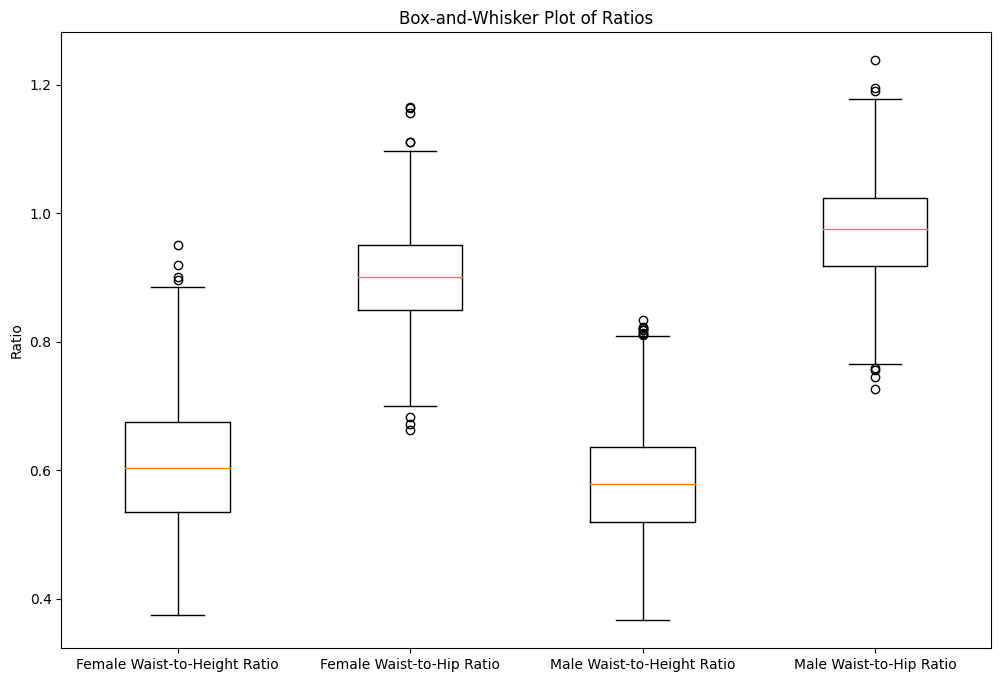

In [64]:
# Prepare data for boxplot
data_ratios = [
    female[:, -2],  # Female Waist-to-Height Ratio
    female[:, -1],  # Female Waist-to-Hip Ratio
    male[:, -2],    # Male Waist-to-Height Ratio
    male[:, -1]     # Male Waist-to-Hip Ratio
]

# Create the box-and-whisker plot
plt.figure(figsize=(12, 8))
plt.boxplot(data_ratios, labels=['Female Waist-to-Height Ratio', 'Female Waist-to-Hip Ratio', 'Male Waist-to-Height Ratio', 'Male Waist-to-Hip Ratio'])
plt.title('Box-and-Whisker Plot of Ratios')
plt.ylabel('Ratio')
plt.show()


**Observations:**

In comparison to men, women have a lower median and less variation (**Waist-to-Height Ratio:**).
  - **Males:** Greater variability and a higher median.

**Waist-to-Hip Ratio:** - **Females:** Wider hips are reflected by a higher median with less variation.
  - **Males:** Less noticeable hips are indicated by a lower median and greater variation.

**Summaray:**

The waist-to-hip and waist-to-height ratios show clear disparities between boys and girls according to the box-and-whisker plot:

* Due to usual gender disparities in fat distribution, women typically have higher waist-to-hip ratios but lower waist-to-height ratios.

* Men often have lower waist-to-hip and higher waist-to-height ratios, which suggests a distinct distribution pattern of body fat and greater variation in their body

# 11. **Advantages and Disadvantages:**

#### **Body Mass Index (BMI):**
- **Advantages:**

 - It is straightforward and quick to calculate based on height and weight.
 - It is commonly employed as a general tool to screen for obesity and underweight conditions.
 - It allows for easy comparisons across large populations.

- **Disadvantages:**
 - It does not differentiate between muscle mass and fat mass.
 - It may inaccurately categorize athletic individuals as overweight or obese.
 - It overlooks fat distribution considerations.

#### **Waist-to-Height Ratio:**

- **Advantages:**

 - It is easy to measure and calculate.
 - It provides insights into fat distribution.
 - It is a better predictor of health risks compared to BMI.

- **Disadvantages:**

 - Its usage is less common than that of BMI.
 - Measurement errors can impact accuracy.



#### **Waist-to-Hip Ratio:**
- **Advantages:**

  - It reveals fat distribution patterns.
  - It is beneficial for evaluating cardiovascular disease risk.
  - It is a more accurate predictor of metabolic syndrome than BMI.

- **Disadvantages:**

  - Measuring it accurately can be more complex.
  - It is less frequently used than BMI.

# 12. **Standardized Measurements for Extremes in BMI**

Finally, we will display the standardized body measurements for the 5 individuals with the lowest and highest BMIs.

In [65]:
# Find indices of lowest and highest BMIs
sorted_indices = np.argsort(zfemale[:, -1])    # Sort by BMI column

# Identify indices of the lowest and highest BMI
lowest_indices = sorted_indices[:5]        # Indices of the 5 participants with the lowest BMI
highest_indices = sorted_indices[-5:]      # Indices of the 5 participants with the highest BMI

# Extract the standardized measurements for the lowest and highest BMIs
lowest_measurements = zfemale[lowest_indices]
highest_measurements = zfemale[highest_indices]

# Print the standardized measurements
print("Standardized Measurements for 5 Participants with the Lowest BMI:\n", lowest_measurements)
print("\nStandardized Measurements for 5 Participants with the Highest BMI:\n", highest_measurements)

Standardized Measurements for 5 Participants with the Lowest BMI:
 [[-2.34047857 -1.24671606 -1.60528697 -1.23178309 -2.34794168 -2.23970899
  -2.05958598 -2.26062368]
 [-2.10264797 -0.16317632 -1.78927838  0.42348667 -2.62695879 -2.02442984
  -2.18794409 -2.19618911]
 [-1.69335811  1.92968812  0.74060349  0.62211904 -2.42766085 -1.81657411
  -1.79645184 -2.16825985]
 [-2.05840042 -0.23739137 -0.17935355  0.55590825 -2.46752044 -2.48468182
  -1.96331739 -2.13438084]
 [-1.78185322  0.96489246 -0.04136     0.52280286 -2.36787147 -1.99473617
  -1.80286974 -2.07783789]]

Standardized Measurements for 5 Participants with the Highest BMI:
 [[ 2.60971638 -0.97954188  0.05063571  0.35727588  2.57471744  2.34054051
   1.96444097  3.40527421]
 [ 2.46038089 -1.36546015 -1.0993106  -0.10619965  2.19605135  2.8082159
   2.0029484   3.49822647]
 [ 2.54334505 -1.27640208 -0.17935355 -1.46352085  2.87366435  2.73398171
   3.01697752  3.53411127]
 [ 2.30551446 -1.75137841 -0.45534066 -0.23862123  2.494

**Interpretation of Results:**
* Lowest BMI:

  - Individuals in this group typically exhibit lower standardized weights and higher standardized heights, indicating a leaner physique with reduced body fat.

* Highest BMI:

  - People in this category show higher standardized weights and lower standardized heights, suggesting a heavier and possibly more obese body type.

# **Conclusion:**

This project uses NumPy and Matplotlib to analyze body measurements of adult males and females from the NHANES dataset. We calculated BMI, examined weight distributions, and compared gender-specific statistics using histograms and boxplots. We also analyzed correlations and standardized the data to explore the relationships among different bodily measurements. Besides, we computed and compared waist-to-hip and waist-to-height ratios. This research provides valuable insights for health assessments and gender-based comparisons by emphasizing measurement variability and body composition.

# **Final Thoughts:**

This project displayed how valuable NumPy and Matplotlib are for processing and visualizing data. By using the NHANES dataset, we gained a thorough understanding of body measurements in adult men and women through statistical methods and observational tools. The study pointed out the benefits and limitations of various body measurement approaches while also revealing important differences between genders. Future research could explore factors influencing metabolism and health outcomes, or apply advanced statistical techniques to improve findings.